# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.8 MB/s eta 0:00:00


In [ ]:
# imports
import pandas as pd
import matplotlib as plt
import  seaborn as sns
import sweetviz as sv


In [ ]:
ruta = "/insurance.csv"
df= pd.read_csv(ruta)

# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

In [ ]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Implementación

In [ ]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## AGE

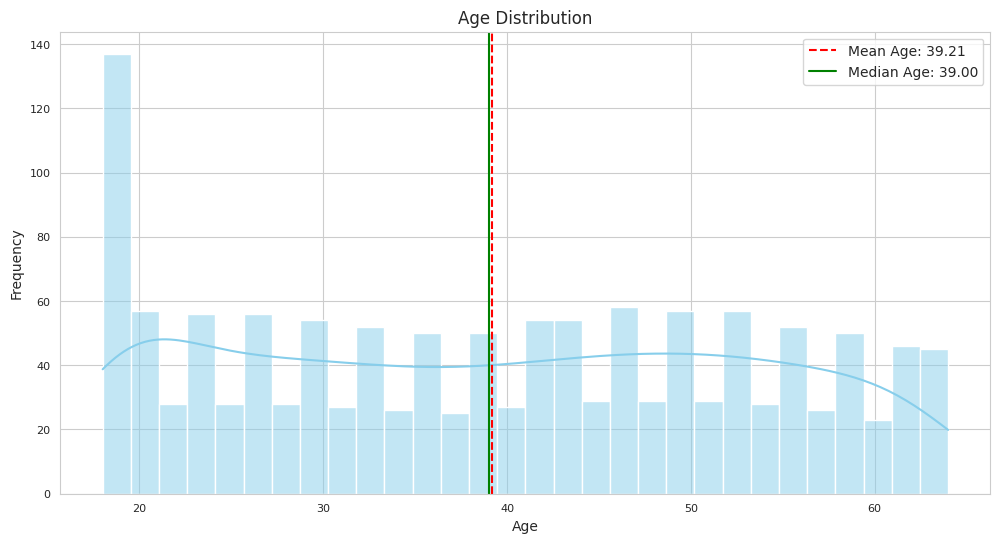

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Statistical summary of the 'age' column
age_stats = df['age'].describe()

# Plotting the distribution of 'age'
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['age'].mean(), color='r', linestyle='--', label=f"Mean Age: {df['age'].mean():.2f}")
plt.axvline(df['age'].median(), color='g', linestyle='-', label=f"Median Age: {df['age'].median():.2f}")
plt.legend()
plt.show()

age_stats


## SEX

<ipython-input-35-bf40fefdb8d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='coolwarm')


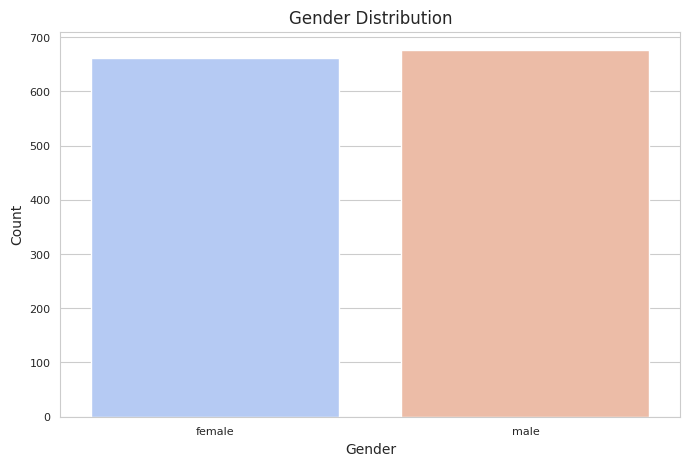

In [ ]:
# Plotting the distribution of 'sex'
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## BMI

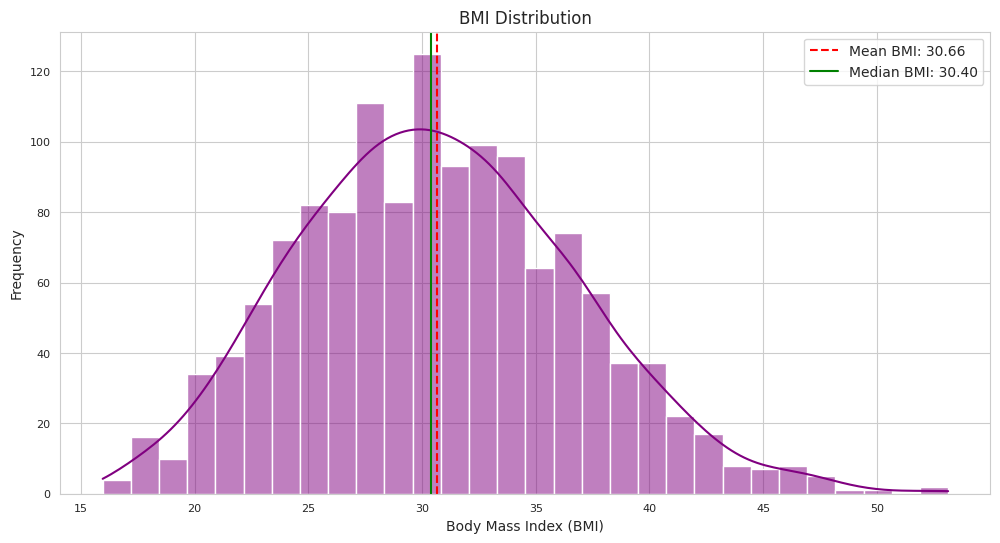

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
# Statistical summary of the 'bmi' column
bmi_stats = df['bmi'].describe()

# Plotting the distribution of 'bmi'
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], kde=True, bins=30, color='purple')
plt.title('BMI Distribution')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Frequency')
plt.axvline(df['bmi'].mean(), color='r', linestyle='--', label=f"Mean BMI: {df['bmi'].mean():.2f}")
plt.axvline(df['bmi'].median(), color='g', linestyle='-', label=f"Median BMI: {df['bmi'].median():.2f}")
plt.legend()
plt.show()

bmi_stats


## CHILDREN

<ipython-input-40-70aa7aefb19f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, palette='viridis')


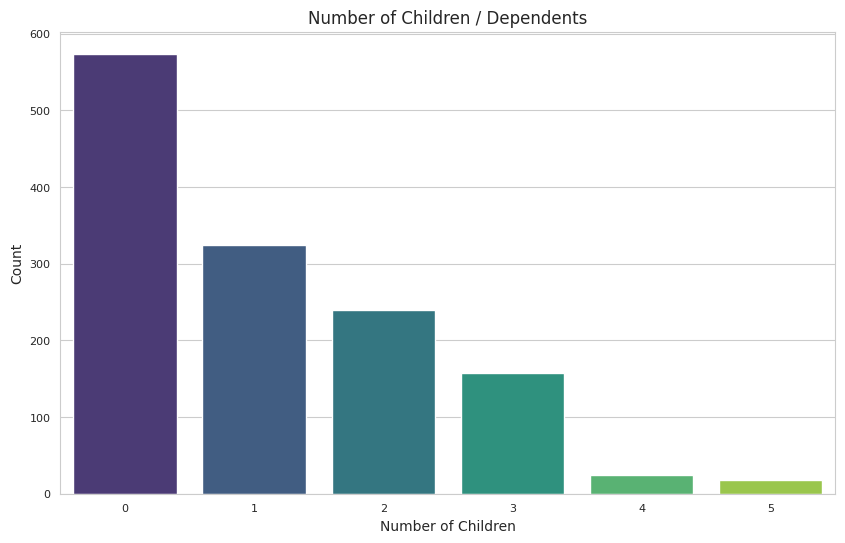

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [ ]:
# Statistical summary of the 'children' column
children_stats = df['children'].describe()

# Plotting the distribution of 'children'
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df, palette='viridis')
plt.title('Number of Children / Dependents')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

children_stats


## SMOKER

<ipython-input-42-9f4dbfa59db3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='Set2')


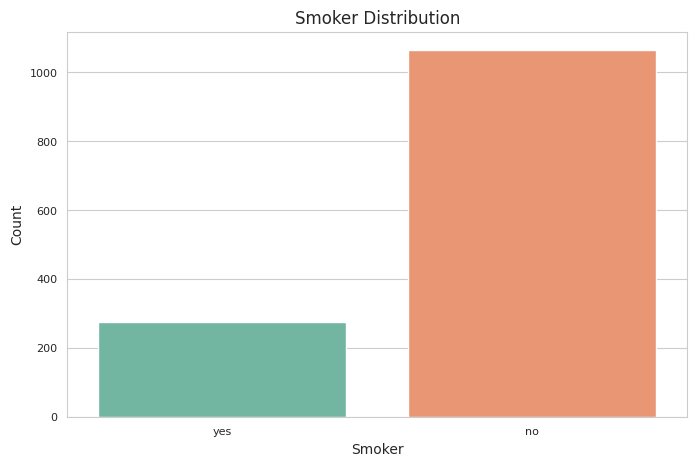

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [ ]:
# Statistical summary of the 'smoker' column
smoker_stats = df['smoker'].describe()

# Plotting the distribution of 'smoker'
plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

smoker_stats


## REGION

<ipython-input-44-3d42f8f0dd3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='Set3')


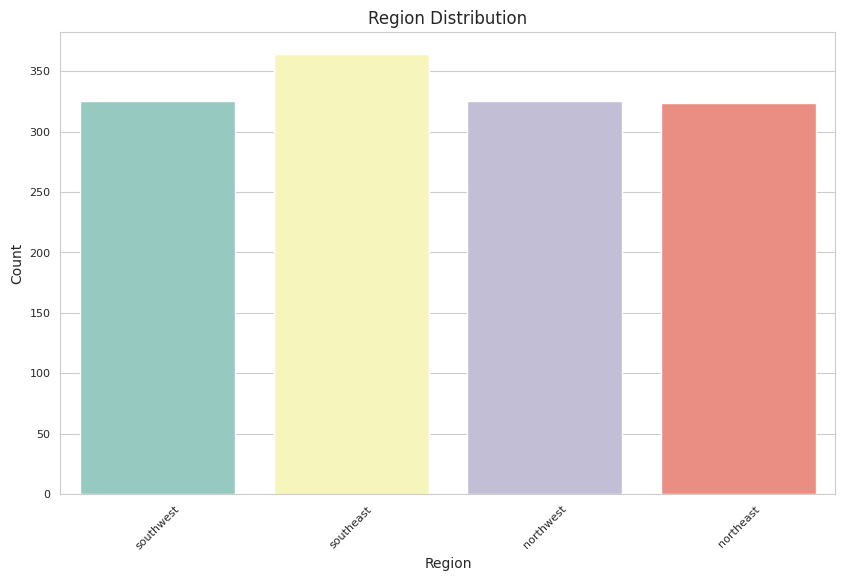

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [ ]:
# Statistical summary of the 'region' column
region_stats = df['region'].describe()

# Plotting the distribution of 'region'
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette='Set3')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

region_stats


## CHARGES

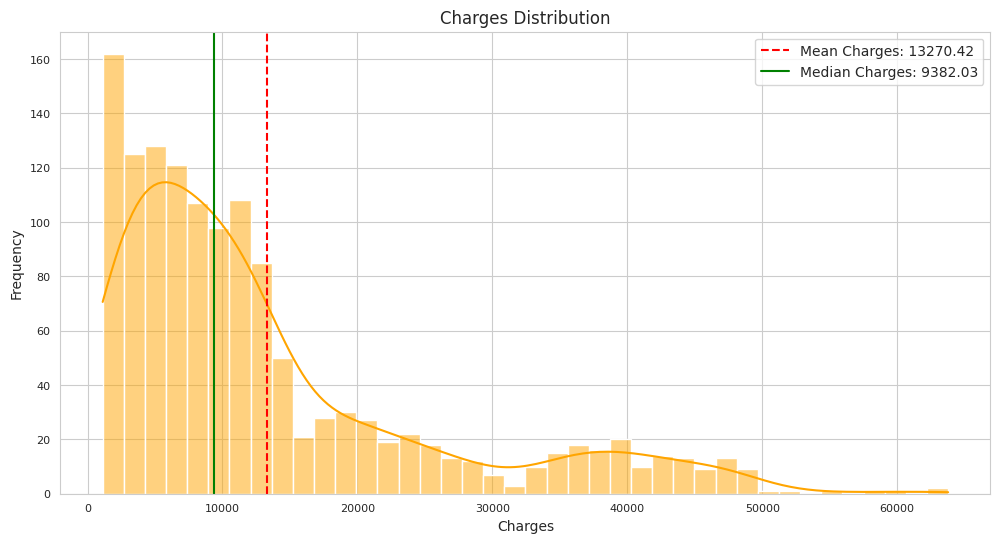

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
# Statistical summary of the 'charges' column
charges_stats = df['charges'].describe()

# Plotting the distribution of 'charges'
plt.figure(figsize=(12, 6))
sns.histplot(df['charges'], kde=True, bins=40, color='orange')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.axvline(df['charges'].mean(), color='r', linestyle='--', label=f"Mean Charges: {df['charges'].mean():.2f}")
plt.axvline(df['charges'].median(), color='g', linestyle='-', label=f"Median Charges: {df['charges'].median():.2f}")
plt.legend()
plt.show()

charges_stats


## ESTANDARIZACIÓN

In [ ]:
# Reajustando según tus especificaciones:
# 1. Estandarizar solo las variables cuantitativas 'age' y 'bmi'.
# 2. Mantener 'children' y las variables cualitativas sin modificar.
# 3. Utilizar 'charges' como la variable dependiente sin modificarla para el modelo.

# Estandarizando 'age' y 'bmi' únicamente
scaler = StandardScaler()
quantitative_features = df[['age', 'bmi']]
quantitative_features_scaled = scaler.fit_transform(quantitative_features)

# Creando un DataFrame con las variables cuantitativas estandarizadas
quantitative_scaled_df = pd.DataFrame(quantitative_features_scaled, columns=['age', 'bmi'])

# Manteniendo 'children' y las variables cualitativas como están
# Reagregando 'charges' al DataFrame para conservarla para el modelado
modeling_df = pd.concat([quantitative_scaled_df, df[['children', 'sex', 'smoker', 'region', 'charges']]], axis=1)

# Mostrando las primeras filas del DataFrame ajustado
modeling_df.head()


,age,bmi,children,sex,smoker,region,charges
0,-1.438764,-0.453320,0,female,yes,southwest,16884.92400
1,-1.509965,0.509621,1,male,no,southeast,1725.55230
2,-0.797954,0.383307,3,male,no,southeast,4449.46200
3,-0.441948,-1.305531,0,male,no,northwest,21984.47061
4,-0.513149,-0.292556,0,male,no,northwest,3866.85520


## MODELO

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Preparando las variables cualitativas para el modelo mediante One-Hot Encoding
categorical_features = ['sex', 'smoker', 'region']
modeling_df_encoded = pd.get_dummies(modeling_df, columns=categorical_features, drop_first=True)

# Separando las variables predictoras (X) de la variable objetivo (y)
X = modeling_df_encoded.drop('charges', axis=1)
y = modeling_df_encoded['charges']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando y entrenando el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizando predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluando el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(33596915.85136148, 0.7835929767120722)

El valor R² de 0.784 indica que el modelo puede explicar aproximadamente el 78.4% de la variabilidad en los charges del seguro. Esto sugiere que, al incluir las variables cualitativas codificadas y ajustar correctamente las variables cuantitativas, el modelo de regresión lineal puede predecir los costos de seguro con una precisión razonablemente buena.

## GRID

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Creando un pipeline que incluye la transformación polinomial de las características
# seguido por un modelo de regresión lineal
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Parámetros para probar en el grid search
# Probaremos diferentes grados para la transformación polinomial
parameters = {
    'poly__degree': [1, 2, 3]
}

# Inicializando GridSearchCV con el pipeline, los parámetros y la métrica de evaluación
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='r2', n_jobs=-1)

# Ajustando GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
best_parameters = grid_search.best_params_
# Mejor score (R²) encontrado
best_score = grid_search.best_score_

best_parameters, best_score


({'poly__degree': 2}, 0.8268445143163378)

# Conclusiones